# Objective:

1. Following a land eligibility analysis, distribute item placements within the eligible regions
2. Save the resulting available lands as a vector file


In [1]:
# Import GLAES
import glaes as gl

%matplotlib inline

# Create the land eligibility analysis from 00_basic_workflow


<Axes:>

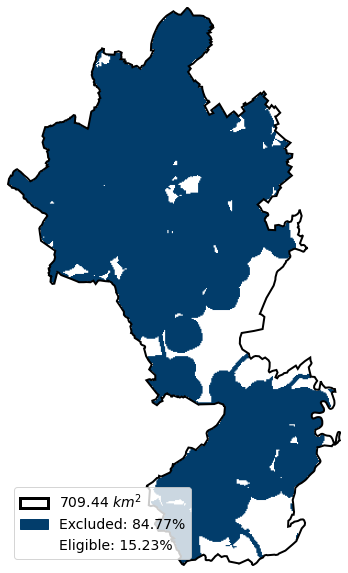

In [2]:
# Choose a region to operate on (Here, a predefined region for Aachen, Germany is used)
regionPath = gl._test_data_['aachenShapefile.shp']

# Initialize ExclusionCalculator object
ec = gl.ExclusionCalculator(regionPath, srs=3035, pixelSize=100)

# Apply Exclusions
ec.excludeRasterType(gl._test_data_["clc-aachen_clipped.tif"], value=(12,22))
ec.excludeRasterType(gl._test_data_["clc-aachen_clipped.tif"], value=(1,2), buffer=1000)
ec.excludeVectorType(gl._test_data_["aachenRoads.shp"], buffer=200, 
                     where="type='motorway' OR type='primary' OR type='trunk'",)

# Draw result
ec.draw()

# Basic placement 

* Separation distance determines the minimal distance between two items 

In [3]:
# first make a copy of the ec object so we can "reset" the ec object after distributing placements and have a "clean" ec again
from copy import copy
ec_backup =copy(ec)

<Axes:>

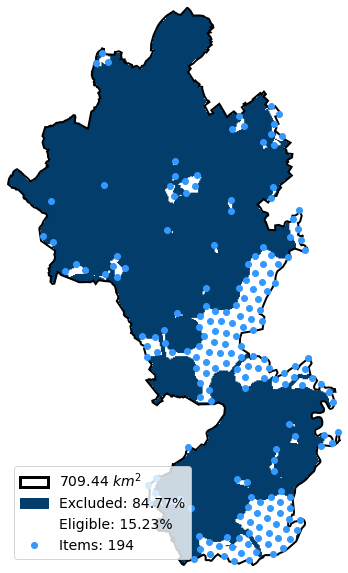

In [4]:
# Do placements
ec.distributeItems(separation=1000)

# Draw result
ec.draw()

<Axes:>

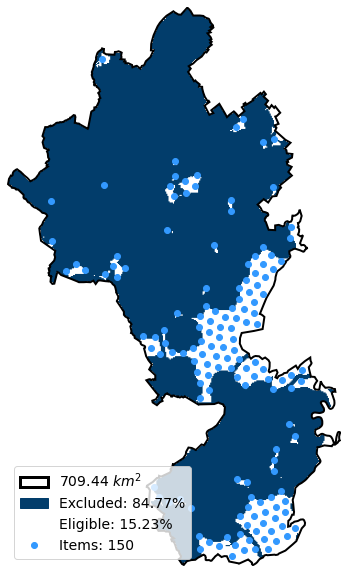

In [5]:
# sometimes it is needed to spare the edges of a region so that the separation distances are maintained also between placements of neighbouring regions
# therefore repeat the step above and set the argument avoidRegionBorders to True
# before, however, reset the ec object to remove the "old" placements from above
ec = copy(ec_backup)
ec.distributeItems(separation=1000, avoidRegionBorders=True)

# Draw result. In comparison to above you can see that no placements are distributed towards the edges of the region, you can also see that less items were distributed
ec.draw()

In [6]:
# Get the placemnts as XY coordinates
print( ec.itemCoords[:5] )

[[4045900.01 3095499.99]
 [4058800.01 3089999.99]
 [4058100.01 3089275.  ]
 [4061600.01 3088199.99]
 [4060600.01 3087899.99]]


In [7]:
# Repeat placement (until border edges), but save as a vector file
# first reset ec again
ec = copy(ec_backup)
ec.distributeItems(separation=1000, output="aachen_placements.shp")

# Direction-dependent placements

* Separation distances determines the minimal distance between two items along an 'axial' and 'transverse' direction
* 'axialDirection' orients the axial direction, and is given in degrees (counter-clockwise, relative to East)


<Axes:>

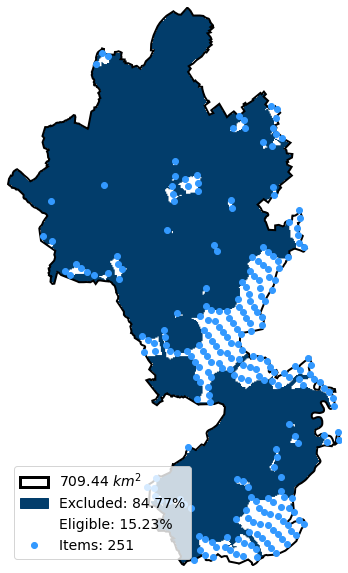

In [8]:
# Do placements after resetting ec
ec = copy(ec_backup)
ec.distributeItems(separation=(1200,600), axialDirection=45)

# Draw result
ec.draw()

450


<Axes:>

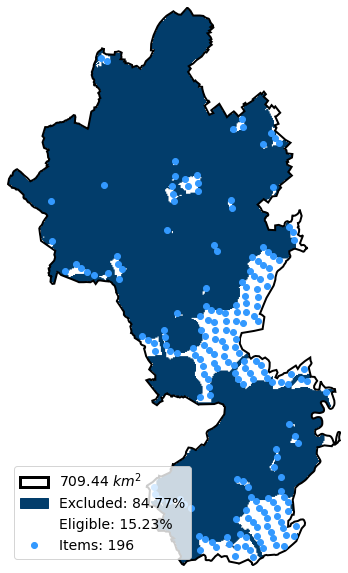

In [9]:
# compare against exclusion of region edges again. Note the number of placements again
# Note that the buffer distance from the edge will be the mean of both distances when an axial and transversion distance are given separately
ec = copy(ec_backup)
ec.distributeItems(separation=(1200,600), axialDirection=45, avoidRegionBorders=True)
ec.draw()

# Identify placement areas 
* Separation distance determines the minimal distance between two items
* 'asArea=True' invokes the identification of nearby eligible areas using Voronoi ploygons
* Can also (optionally) be saved as an output vector file

<Axes:>

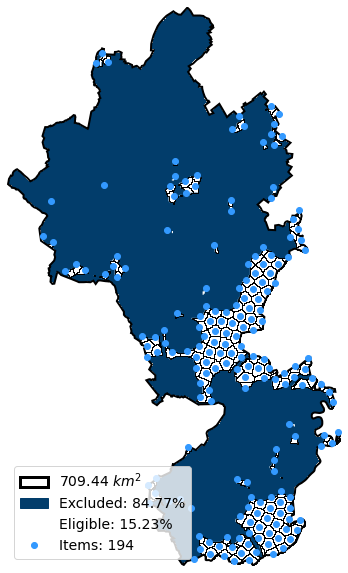

In [10]:
# Do placements
ec = copy(ec_backup)
ec.distributeItems(1000, asArea=True, output="aachen_placement_areas.shp")

# Draw result
ec.draw()